       y    x1   x2     x3     x4       x5       x6    x7
0  36.98   5.1  400  51.37   4.24  1483.83  2227.25  2.06
1  13.74  26.4  400  72.33  30.87   289.94   434.90  1.33
2  10.08  23.8  400  71.44  33.01   320.79   481.19  0.97
3   8.53  46.4  400  79.15  44.61   164.76   247.14  0.62
4  36.42   7.0  450  80.47  33.84  1097.26  1645.89  0.22
PRESS model 2:  333.3639909576649


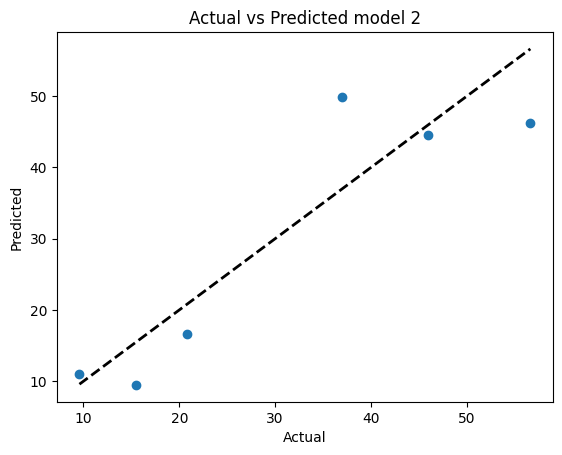

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Model%20Adequacy%20Checking%20(ch.4)/data(ch.4)/table-b5.csv'
df = pd.read_csv(url)

specific_columns = df[["y","x1","x2","x3","x4","x5","x6","x7"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y) for model 1(x6 and x7)
X_model_1 = specific_columns[["x6"]].values
y_model_1 = specific_columns["y"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_model_1, y_model_1, test_size=0.2, random_state=42)

# Fit the linear regression model
X_train = sm.add_constant(X_train)  # Add a constant term
model = sm.OLS(y_train, X_train)
result = model.fit()

# Predict the target variable on the testing set
X_test = sm.add_constant(X_test)  # Add a constant term to the testing set
y_pred = result.predict(X_test)

# Calculate the PRESS statistic
press = ((y_pred - y_test) ** 2).sum()

# Print the PRESS statistic
print("PRESS model 2: ", press)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted model 2')
plt.show()
